# 로지스틱 회귀

#### 시그모이드 함수

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

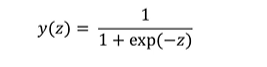

C:\anaconda\envs\test3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\envs\test3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


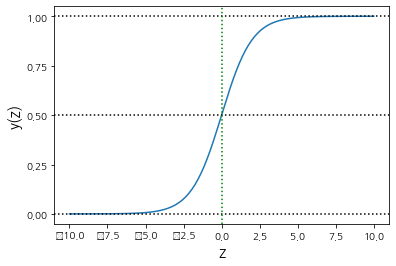

In [2]:
#### 
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 200)
y = sigmoid(z)

plt.plot(z, y)
plt.axhline(y=0, linestyle=':', color='k')
plt.axhline(y=0.5, linestyle=':', color='k')
plt.axhline(y=1, linestyle=':', color='k')
plt.axvline(x=0, linestyle=':', color='g')
plt.yticks([0.0, 0.25, 0.5, 0.75, 1])
plt.xlabel('z', fontsize=15)
plt.ylabel('y(z)', fontsize=15);

# 1. Logistic Regression : 악성종양 판단, 2진 분류

#### 1. 데이터 수집하기

In [3]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer

b_cancer = load_breast_cancer()

#### 2. 데이터 탐색하기

In [4]:
print(b_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
b_cancer.feature_names #30개

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
#데이터프레임으로 전환하고, 타겟(class) 추가
b_cancer_df = pd.DataFrame(b_cancer.data, columns=b_cancer.feature_names)
b_cancer_df['diagnosis'] = b_cancer.target
b_cancer_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
b_cancer_df.shape

(569, 31)

In [12]:
b_cancer_df.info

<bound method DataFrame.info of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
11        15.780         17.89  

#### 데이터 준비, 분할 및 표준화(스케일링)하기

In [14]:
from sklearn.model_selection import train_test_split

X = b_cancer.data
y = b_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, \
                                                     random_state=0 )
                                        
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 스케일링 전 X_train
round(pd.DataFrame(X_train).describe, 3)

In [ ]:
# 스케일링 후 X_train_scaled(평균, 표준편차))
round(pd.DataFrame(X_train_scaled).describe(), 3)

In [18]:
pd.DataFrame(X_train_scaled).describe

<bound method NDFrame.describe of            0         1         2         3         4         5         6   \
0   -0.749980 -1.099787 -0.741586 -0.701887  0.584593 -0.427726 -0.457550   
1   -1.028214 -0.139262 -1.029804 -0.894732  0.742882 -0.731843 -0.843301   
2   -0.538522 -0.299349 -0.568574 -0.550561 -0.714814 -0.731647 -0.639856   
3    1.147577 -0.146430  1.061698  1.035628 -0.762301 -0.380637 -0.091016   
4   -2.004538 -1.376954 -1.962370 -1.415904  1.476766 -0.557221 -1.137578   
5   -1.223813  0.178524 -1.221815 -1.003446  0.426304 -1.002017 -1.050089   
6   -0.307588 -0.832178 -0.271059 -0.387490  0.793246  0.449701 -0.552354   
7   -0.844580 -1.460582 -0.867707 -0.764712  0.076630 -1.038903 -0.883657   
8    0.254445  0.675513  0.199065  0.139146 -0.425577 -0.652773 -0.464596   
9    1.236612  1.413827  1.312323  1.164010  0.714102  1.660283  1.833383   
10  -0.699898  0.197639 -0.692270 -0.671021  0.368744 -0.187375 -0.599500   
11  -0.193512  0.742415 -0.219317 -0.27549

#### 로지스틱 모델 구축

In [19]:
from sklearn.linear_model import LogisticRegression

#1) 모델 생성
reg = LogisticRegression()

#2) 모델 훈련
reg.fit(X_train_scaled, y_train)

#3) 평가 데이터에 대한 예측 수행
y_pred = reg.predict(X_test_scaled)
y_pred[:5]

array([0, 1, 1, 1, 1])

In [20]:
y_pred_proba = reg.predict_proba(X_test_scaled)
y_pred_proba[:5]

array([[9.98602542e-01, 1.39745805e-03],
       [4.00384053e-02, 9.59961595e-01],
       [1.36872289e-03, 9.98631277e-01],
       [1.03868343e-02, 9.89613166e-01],
       [2.92998187e-04, 9.99707002e-01]])

In [21]:
np.set_printoptions(suppress=True)
y_pred_proba = reg.predict_proba(X_test_scaled)
print(y_pred_proba[:5])

np.set_printoptions(suppress=False)

[[0.99860254 0.00139746]
 [0.04003841 0.95996159]
 [0.00136872 0.99863128]
 [0.01038683 0.98961317]
 [0.000293   0.999707  ]]


In [22]:
# 회귀 계수 확인
print(reg.coef_)

[[-0.2832411  -0.59209915 -0.2972598  -0.36775202 -0.14104012  0.41628173
  -0.66565913 -0.74229481 -0.39025773  0.04165549 -1.38128497  0.12860473
  -0.96157455 -0.96323792  0.25458711  0.9235784  -0.11136139 -0.36267771
   0.1433099   0.89208519 -0.86845879 -0.88672476 -0.75544795 -0.84696401
  -0.56052756  0.17498866 -0.83309241 -1.05993436 -0.47430265 -0.60872579]]


#### 생성한 모델 성능 지표 확인하기

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score

#오차행렬
confusion_matrix(y_test, y_pred)

array([[ 60,   3],
       [  1, 107]], dtype=int64)

In [25]:
#정확도, 정밀도, 재현율 지표확인
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("정확도: {:.3f}".format(accuracy))
print("정밀도: {:.3f}".format(precision))
print("재현율: {:.3f}".format(recall))

정확도: 0.977
정밀도: 0.973
재현율: 0.991


# 2. Logistic Regression: 붓꽃 데이터 , 다중 분류

#### 데이터 수집하기

In [26]:
from sklearn.datasets import load_iris

iris = load_iris()

#### 데이터 탐색하기

In [27]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [28]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [29]:
#데이터프레임으로 전환하고, 타겟(class) 추가하되 범주형으로 추가 
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
species = pd.Series(iris.target, dtype='category')
species = species.cat.rename_categories(iris.target_names)
iris_df['species'] = species
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#데이터셋의 크기, 독립변수 X의 피처 정보 확인

In [45]:
pip install --upgrade pandas

  Using cached pandas-1.3.0-cp37-cp37m-win_amd64.whl (10.0 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'c:\\anaconda\\envs\\test3\\lib\\site-packages\\~-ndas\\io\\msgpack\\_packer.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [47]:
iris_df.info

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
5                  5.4               3.9                1.7               0.4   
6                  4.6               3.4                1.4               0.3   
7                  5.0               3.4                1.5               0.2   
8                  4.4               2.9                1.4               0.2   
9                  4.9               3.1                1.5               0.1   
10                 5.4               3.7                1.5               0.2

In [31]:
iris_df['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [ ]:
iris_df.plot()

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# hue 옵션을 주면, 첫번째 그림이 
#히스토그램에서 커널 밀도 추정(KDE) 그래프로 변경됨
sns.pairplot(iris_df)

In [ ]:
sns.pairplot(iris_df, hue='species')

In [ ]:
# 3종류인것을 추측 가능

#### 데이터 준비, 분할, 전처리

In [49]:
# X, y 설정하기
X = iris.data
y = iris.target

# 데이터 분할: 붓꽃의 타겟 데이터가 
# 테스트 세트도 훈련 세트와 동일한 비율로 들어갈 수 있도록 
# 분할시 stratify옵션을 준다. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=1,
                                                   stratify=iris.target)

# 훈련데이터, 테스트 데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 로지스틱 모델 구축

In [51]:
# 로지스틱 회귀 객체 생성
# 꽃의 종류가 3가지(이진 분류가 아님, solver, multiclass option을 주는 이유)
reg = LogisticRegression(solver='lbfgs',
                        multi_class='auto',
                        max_iter=10000,
                        C=100, random_state=1)
reg.fit(X_train_scaled, y_train)
# 테스트 데이터를 모델에 적용하여 y_pred 구하기
y_pred = reg.predict(X_test_scaled)

In [52]:
y_pred[:10]

array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1])

In [53]:
np.set_printoptions(suppress=True)
y_pred_proba = reg.predict_proba(X_test_scaled)
print(y_pred_proba[:10])

np.set_printoptions(suppress=True)

[[0.         0.0001152  0.9998848 ]
 [0.99939799 0.00060201 0.        ]
 [0.02675566 0.97324428 0.00000006]
 [0.9999032  0.0000968  0.        ]
 [0.99929304 0.00070696 0.        ]
 [0.99982163 0.00017837 0.        ]
 [0.         0.00029766 0.99970234]
 [0.         0.00380588 0.99619412]
 [0.00000022 0.01044999 0.98954978]
 [0.00000056 0.98820706 0.01179238]]


#### 모델의 성능 지표 확인

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
#오차행렬
print(confusion_matrix(y_test, y_pred))

#정확도, 정밀도, 재현율 지표확인
accuracy = accuracy_score(y_test, y_pred)
print("정확도: {:.3f}".format(accuracy))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
정확도: 1.000


In [ ]:
#####################################################################################################################